In [1]:
from efficient_apriori import apriori 
# 设置数据集
transactions = [
    ('牛奶','面包','尿布'),
		('可乐','面包', '尿布', '啤酒'),
		('牛奶','尿布', '啤酒', '鸡蛋'),
		('面包', '牛奶', '尿布', '啤酒'),
		('面包', '牛奶', '尿布', '可乐')
]
# 挖掘频繁项集和频繁规则
itemsets, rules = apriori(transactions,min_support = 0.5,min_confidence = 1)
print('频繁项集：',itemsets)
print('关联规则：',rules)

频繁项集： {1: {('面包',): 4, ('牛奶',): 4, ('尿布',): 5, ('啤酒',): 3}, 2: {('尿布', '牛奶'): 4, ('尿布', '面包'): 4, ('牛奶', '面包'): 3, ('啤酒', '尿布'): 3}, 3: {('尿布', '牛奶', '面包'): 3}}
关联规则： [{牛奶} -> {尿布}, {面包} -> {尿布}, {啤酒} -> {尿布}, {牛奶, 面包} -> {尿布}]


In [2]:
# 调整超参数之后，频繁项集和 
itemsets, rules = apriori(transactions,min_support = 0.5,min_confidence = 0.5)
print('频繁项集：',itemsets)
print('关联规则：',rules)

频繁项集： {1: {('面包',): 4, ('牛奶',): 4, ('尿布',): 5, ('啤酒',): 3}, 2: {('尿布', '牛奶'): 4, ('尿布', '面包'): 4, ('牛奶', '面包'): 3, ('啤酒', '尿布'): 3}, 3: {('尿布', '牛奶', '面包'): 3}}
关联规则： [{牛奶} -> {尿布}, {尿布} -> {牛奶}, {面包} -> {尿布}, {尿布} -> {面包}, {面包} -> {牛奶}, {牛奶} -> {面包}, {尿布} -> {啤酒}, {啤酒} -> {尿布}, {牛奶, 面包} -> {尿布}, {尿布, 面包} -> {牛奶}, {尿布, 牛奶} -> {面包}, {面包} -> {尿布, 牛奶}, {牛奶} -> {尿布, 面包}, {尿布} -> {牛奶, 面包}]


# 案例1：BreadBasket数据集（21293笔订单）

#### 方法一: efficient_apriori 

In [75]:
import pandas as pd 
import time 

In [76]:
# 数据加载
data = pd.read_csv('./BreadBasket/BreadBasket_DMS.csv')
# 统一小写
data['Item'] = data['Item'].str.lower()

In [78]:
data.head()

,Date,Time,Transaction,Item
0,2016/10/30,9:58:11,1,none
1,2016/10/30,10:05:34,2,scandinavian
2,2016/10/30,10:05:34,2,scandinavian
3,2016/10/30,10:07:57,3,hot chocolate
4,2016/10/30,10:07:57,3,jam


In [80]:
# 去掉 none项
data = data.drop(data[data.Item == 'none'].index)


In [81]:
data.head()

,Date,Time,Transaction,Item
1,2016/10/30,10:05:34,2,scandinavian
2,2016/10/30,10:05:34,2,scandinavian
3,2016/10/30,10:07:57,3,hot chocolate
4,2016/10/30,10:07:57,3,jam
5,2016/10/30,10:07:57,3,cookies


In [82]:
# 采取 efficient_apriori 工具包
from efficient_apriori import apriori
start = time.time()
# 得到一维数组 orders_series，并且将 Transactions 作为 index, value为 Item取值
order_series = data.set_index('Transaction')['Item']
# 将数据进行格式转换
transactions = []
temp_index = 0 
for i, v in orders_series.items():
    if i != temp_index:
        temp_set = set()
        temp_index = i
        temp_set.add(v)
        transactions.append(temp_set)
    else:
        temp_set.add(v)
        

In [83]:
transactions[:4]

[{'scandinavian'},
 {'cookies', 'hot chocolate', 'jam'},
 {'muffin'},
 {'bread', 'coffee', 'pastry'}]

In [84]:
# 挖掘频繁项集和频繁规则
itemsets, rules = apriori(transactions, min_support = 0.02, min_confidence = 0.5)
print('频繁项集：',itemsets)
print('关联规则：',rules)
end = time.time()
print('用时：',end - start)

频繁项集： {1: {('scandinavian',): 275, ('cookies',): 515, ('hot chocolate',): 552, ('muffin',): 364, ('pastry',): 815, ('bread',): 3096, ('coffee',): 4528, ('medialuna',): 585, ('tea',): 1350, ('farm house',): 371, ('juice',): 365, ('soup',): 326, ('cake',): 983, ('sandwich',): 680, ('alfajores',): 344, ('brownie',): 379, ('truffles',): 192, ('toast',): 318, ('scone',): 327}, 2: {('bread', 'coffee'): 852, ('bread', 'pastry'): 276, ('coffee', 'pastry'): 450, ('coffee', 'medialuna'): 333, ('coffee', 'tea'): 472, ('bread', 'tea'): 266, ('coffee', 'juice'): 195, ('coffee', 'hot chocolate'): 280, ('coffee', 'cookies'): 267, ('cake', 'coffee'): 518, ('cake', 'tea'): 225, ('bread', 'cake'): 221, ('coffee', 'sandwich'): 362, ('coffee', 'toast'): 224}}
关联规则： [{pastry} -> {coffee}, {medialuna} -> {coffee}, {juice} -> {coffee}, {hot chocolate} -> {coffee}, {cookies} -> {coffee}, {cake} -> {coffee}, {sandwich} -> {coffee}, {toast} -> {coffee}]
用时： 163.58074402809143


#### 方法二：使用 mlxtend
- 使用 from mlxtend.frequent_patterns import apriori 
- 使用 from mlxtend.frequent_patterns import association_rules

In [226]:
import numpy as np 
import pandas as pd 

In [242]:
data = pd.read_csv('./BreadBasket/BreadBasket_DMS.csv')
data.head()

,Date,Time,Transaction,Item
0,2016/10/30,9:58:11,1,NONE
1,2016/10/30,10:05:34,2,Scandinavian
2,2016/10/30,10:05:34,2,Scandinavian
3,2016/10/30,10:07:57,3,Hot chocolate
4,2016/10/30,10:07:57,3,Jam


In [243]:
# 将 Item 这一列的字母都小写
data['Item'] = data['Item'].str.lower()
data.head()

,Date,Time,Transaction,Item
0,2016/10/30,9:58:11,1,none
1,2016/10/30,10:05:34,2,scandinavian
2,2016/10/30,10:05:34,2,scandinavian
3,2016/10/30,10:07:57,3,hot chocolate
4,2016/10/30,10:07:57,3,jam


In [244]:
# 删除掉 Item为 none 的行
data = data.drop(data[data['Item'] == 'none'].index)
data.head()

,Date,Time,Transaction,Item
1,2016/10/30,10:05:34,2,scandinavian
2,2016/10/30,10:05:34,2,scandinavian
3,2016/10/30,10:07:57,3,hot chocolate
4,2016/10/30,10:07:57,3,jam
5,2016/10/30,10:07:57,3,cookies


In [245]:
# 定义一个独热编码器
def encode_units(x):
    if x <= 0:
        return 0 
    if x >= 1:
        return 1 

In [246]:
# 采用 mlxtend.frequent_patterns 工具包
from mlxtend.frequent_patterns import apriori, association_rules 
pd.options.display.max_columns = 100

In [247]:
start = time.time()

In [248]:
hot_encoded_df = data.groupby(['Transaction','Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')

In [249]:
hot_encoded_df

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,bowl nic pitt,bread,bread pudding,brioche and salami,brownie,cake,caramel bites,cherry me dried fruit,chicken sand,chicken stew,chimichurri oil,chocolates,christmas common,coffee,coffee granules,coke,cookies,crepes,crisps,drinking chocolate spoons,duck egg,dulce de leche,eggs,ella's kitchen pouches,empanadas,extra salami or feta,fairy doors,farm house,focaccia,frittata,fudge,gift voucher,gingerbread syrup,granola,hack the stack,half slice monster,hearty & seasonal,honey,hot chocolate,jam,jammie dodgers,juice,keeping it local,kids biscuit,lemon and coconut,medialuna,mighty protein,mineral water,mortimer,muesli,muffin,my-5 fruit shoot,nomad bag,olum & polenta,panatone,pastry,pick and mix bowls,pintxos,polenta,postcard,raspberry shortbread sandwich,raw bars,salad,sandwich,scandinavian,scone,siblings,smoothies,soup,spanish brunch,spread,tacos/fajita,tartine,tea,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [250]:
hot_encoded_df = hot_encoded_df.applymap(encode_units)

In [251]:
# 使用频繁项集
frequent_itemsets = apriori(hot_encoded_df, min_support = 0.02,use_colnames = True)

In [254]:
# 先挖掘出来频繁项集合，再找关联规则
rules = association_rules(frequent_itemsets, metric = 'lift',min_threshold = 1)

In [255]:
print('频繁项集：',frequent_itemsets)
print('关联规则：',rules)
end = time.time()
print('用时：',end - start)

频繁项集：      support                 itemsets
0   0.036348              (alfajores)
1   0.327134                  (bread)
2   0.040046                (brownie)
3   0.103867                   (cake)
4   0.478445                 (coffee)
5   0.054417                (cookies)
6   0.039201             (farm house)
7   0.058326          (hot chocolate)
8   0.038567                  (juice)
9   0.061813              (medialuna)
10  0.038462                 (muffin)
11  0.086116                 (pastry)
12  0.071851               (sandwich)
13  0.029057           (scandinavian)
14  0.034552                  (scone)
15  0.034446                   (soup)
16  0.142646                    (tea)
17  0.033601                  (toast)
18  0.020287               (truffles)
19  0.023352            (bread, cake)
20  0.090025          (bread, coffee)
21  0.029163          (pastry, bread)
22  0.028107             (tea, bread)
23  0.054734           (cake, coffee)
24  0.023774              (tea, cake)
25  0.

# 案例二：分析 MovieLens ,电影分类中的频繁项集和关联规则

In [301]:
# 分析 MoviesLens 电影分类中的频繁项集和关联规则
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules 

In [302]:
# 数据加载
movies = pd.read_csv('./MovieLens/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [304]:
# 将 genres 对应的这一列进行标签编码
movies_hot_encoded = movies.drop('genres',axis = 1).join(movies.genres.str.get_dummies(sep = '|'))

In [305]:
movies_hot_encoded.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [306]:
pd.options.display.max_columns = 100 
movies_hot_encoded.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [307]:
# 将movieId,title 设置为 index 
movies_hot_encoded.set_index(['movieId','title'],inplace = True)

In [308]:
movies_hot_encoded.head()

,,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,title,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [310]:
# 挖掘频繁项集，最小支持度为 0.02 
itemsets = apriori(movies_hot_encoded, use_colnames = True, min_support = 0.02)
# 按照支持度从大到小进行排序
itemsets = itemsets.sort_values(by = 'support',ascending = False)
print(itemsets)

     support                  itemsets
7   0.489185                   (Drama)
4   0.306987                  (Comedy)
14  0.153164                (Thriller)
12  0.151294                 (Romance)
0   0.129042                  (Action)
5   0.107743                   (Crime)
9   0.095718                  (Horror)
31  0.094325          (Drama, Romance)
26  0.093335           (Drama, Comedy)
6   0.090586             (Documentary)
1   0.085380               (Adventure)
27  0.069470         (Comedy, Romance)
32  0.068480         (Drama, Thriller)
13  0.063898                  (Sci-Fi)
28  0.062761            (Drama, Crime)
11  0.055503                 (Mystery)
8   0.051763                 (Fantasy)
29  0.045165         (Thriller, Crime)
20  0.044101           (Drama, Action)
15  0.043772                     (War)
3   0.041755                (Children)
22  0.040655        (Thriller, Action)
34  0.039336        (Thriller, Horror)
10  0.037979                 (Musical)
2   0.037649             

In [311]:
# 根据频繁项集计算关联规则
rules = association_rules(itemsets, metric = 'lift',min_threshold = 2)
# 安装提升度从大到小进行排序
rules = rules.sort_values(by = 'lift',ascending = False)

In [312]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(Mystery),(Thriller),0.055503,0.153164,0.029144,0.525099,3.428352,0.020643,1.783185
8,(Thriller),(Mystery),0.153164,0.055503,0.029144,0.190282,3.428352,0.020643,1.166453
15,(Crime),"(Drama, Thriller)",0.107743,0.068480,0.024965,0.231711,3.383632,0.017587,1.212461
12,"(Drama, Thriller)",(Crime),0.068480,0.107743,0.024965,0.364561,3.383632,0.017587,1.404159
7,(Action),(Adventure),0.129042,0.085380,0.035633,0.276136,3.234198,0.024616,1.263525
6,(Adventure),(Action),0.085380,0.129042,0.035633,0.417347,3.234198,0.024616,1.494813
16,(Sci-Fi),(Action),0.063898,0.129042,0.023499,0.367757,2.849906,0.015253,1.377568
17,(Action),(Sci-Fi),0.129042,0.063898,0.023499,0.182102,2.849906,0.015253,1.144523
0,(Thriller),(Crime),0.153164,0.107743,0.045165,0.294878,2.736877,0.028662,1.265394
1,(Crime),(Thriller),0.107743,0.153164,0.045165,0.419190,2.736877,0.028662,1.458027


# 案例三:电影演员中的关联关系

In [314]:
import pandas as pd 
from mlxtend.frequent_patterns import apriori,association_rules

In [315]:
# 数据加载
movies_actor = pd.read_csv('./MovieActors/movie_actors.csv')
movies_actor.head()

,title,actors
0,囧妈‎ (2020),徐峥/黄梅莹/袁泉/贾冰/郭京飞/沈腾/吴云芳/陈奇
1,我和我的祖国‎ (2019),陈凯歌/张一白/管虎/薛晓路/徐峥/宁浩/文牧野/黄渤/张译/韩昊霖/杜江/葛优/刘昊然/宋...
2,我不是药神‎ (2018),文牧野/徐峥/王传君/周一围/谭卓/章宇/杨新鸣/王佳佳/王砚辉
3,疯狂的外星人‎ (2019),宁浩/黄渤/沈腾/汤姆·派福瑞/马修·莫里森/徐峥/于和伟/雷佳音/刘桦
4,疯狂的石头‎ (2006),宁浩/郭涛/刘桦/连晋/黄渤/徐峥/优恵/罗兰/王迅


In [318]:
movies_actor_hot_encoded = movies_actor.drop('actors',axis = 1).join(movies_actor['actors'].str.get_dummies(sep = '/'))

In [320]:
pd.options.display.max_columns = 100
movies_actor_hot_encoded.head()

,title,GangZhao,LukeZhiGangLiu,PengZhenZhong,YuanFang,一纳,丁嘉丽,丁志城,丁志诚,丁黑,万弘杰,严敏,严晓频,中孝介,丹尼尔·海尼,乔任梁,九孔,于和伟,于波,于荣光,于谦,仁龙,付连智,任达华,任静,任鹏远,伊一,伊春德,伊能静,伊莎贝尔·于佩尔,优恵,何念,何炅,何琳,余彬,余文乐,余男,佟丽娅,佟大为,佟瑞欣,侯勇,侯梦莎,保剑锋,俞杭英,倪虹洁,傅东育,傅彪,傅浤鸣,傅艺伟,克里斯·帕拉特,...,陈正道,陈红,陈继铭,陈逸宁,陶慧,陶晶莹,陶白莉,陶虹,隋兰,雷佳音,雷恪生,雷蒙德·雷德,霍建起,鞠觉亮,韩三平,韩东君,韩庚,韩昊霖,颜丙燕,马东,马修·莫里森,马健,马少骅,马思纯,马晓伟,马特·弗里沃,马苏,高一功,高圆圆,高宝宝,高捷,魏宗万,魏积安,鲍国安,麦斯·米科尔森,黄奕,黄宏,黄小蕾,黄尧,黄建新,黄晓明,黄梅莹,黄渤,黄磊,黄蜀芹,黄轩,黄达亮,黄龄,黎明,黑泽清
0,囧妈‎ (2020),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,我和我的祖国‎ (2019),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,我不是药神‎ (2018),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,疯狂的外星人‎ (2019),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,疯狂的石头‎ (2006),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [321]:
movies_actor_hot_encoded.set_index(['title'], inplace = True)

In [323]:
itemsets = apriori(movies_actor_hot_encoded,use_colnames= True,min_support = 0.05)
itemsets = itemsets.sort_values(by = 'support',ascending = False)

itemsets.head()

,support,itemsets
2,0.768421,(徐峥)
7,0.157895,(黄渤)
11,0.094737,"(黄渤, 徐峥)"
1,0.073684,(宁浩)
0,0.063158,(于和伟)


In [324]:
# 根据频繁项集计算关联规则，设置最小提升度为 5 
rules = association_rules(itemsets, metric = 'lift',min_threshold = 5)
rules = rules.sort_values(by = 'lift',ascending = False)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,"(黄渤, 徐峥)",(宁浩),0.094737,0.073684,0.063158,0.666667,9.047619,0.056177,2.778947
5,(宁浩),"(黄渤, 徐峥)",0.073684,0.094737,0.063158,0.857143,9.047619,0.056177,6.336842
3,"(宁浩, 徐峥)",(黄渤),0.063158,0.157895,0.063158,1.000000,6.333333,0.053186,inf
7,(王迅),(黄渤),0.052632,0.157895,0.052632,1.000000,6.333333,0.044321,inf
4,(黄渤),"(宁浩, 徐峥)",0.157895,0.063158,0.063158,0.400000,6.333333,0.053186,1.561404


# 案例四:Person系数示例子

In [342]:
import pandas as pd 

In [343]:
x = [i for i in range(100)]
y = [2 * i * i for i in x]

In [344]:
data = pd.DataFrame({'x':x,'y':y})
data.head()

,x,y
0,0,0
1,1,2
2,2,8
3,3,18
4,4,32


In [345]:
data.corr()

,x,y
x,1.000000,0.967644
y,0.967644,1.000000


In [347]:
data.corr(method = 'pearson')

,x,y
x,1.000000,0.967644
y,0.967644,1.000000


In [348]:
data.corr(method = 'spearman')

,x,y
x,1.0,1.0
y,1.0,1.0


In [349]:
data.corr(method = 'kendall')

,x,y
x,1.0,1.0
y,1.0,1.0


# 案例五:糖尿病

In [385]:
'''
使用 sklearn 自带的糖尿病数据集，进行回归分析
'''

'\n使用 sklearn 自带的糖尿病数据集，进行回归分析\n'

In [386]:
from sklearn import datasets
from  sklearn import linear_model 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 

In [387]:
# 加载数据
diabetes = datasets.load_diabetes()

In [393]:
type(diabetes)

sklearn.utils.Bunch

In [394]:
data = diabetes.data

In [395]:
data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [396]:
data.shape

(442, 10)

In [397]:
data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [400]:
target = diabetes.target

In [401]:
target.shape

(442,)

In [402]:
X_train, X_test, y_train,y_test = train_test_split(data,target,test_size = 0.3, random_state = 12)

In [403]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [404]:
y_pred = model.predict(X_test)

In [405]:
mse = mean_squared_error(y_test,y_pred)

In [406]:
mse

3157.5999693478434

In [407]:
r_sq = model.score(X_train,y_train)

# 案例六：股票预测

In [427]:
import numpy as np 
import pandas 
import os 
import datetime 
from pandas_datareader.data import DataReader 

In [438]:
# 设置起始、终止时间
start = datetime.datetime(2019,1,1)
end = datetime.datetime(2019,12,31)

In [439]:
# 读取上证综指及探路者数据
def load_data():
	if os.path.exists('000001.csv'):
		data_ss = pd.read_csv('000001.csv')
		data_tlz = pd.read_csv('300005.csv')
	else:
		# 上证综指
		data_ss = DataReader("000001.SS", "yahoo",start,end)
		# 300005 探路者股票 深证
		data_tlz = DataReader("300005.SZ", "yahoo",start,end)
		data_ss.to_csv('000001.csv')
		data_tlz.to_csv('300005.csv')
	return data_ss, data_tlz


In [440]:
load_data()

(           Date         High          Low         Open        Close    Volume  \
 0    2019-01-02  2500.278076  2456.423096  2497.881104  2465.291016  109900.0   
 1    2019-01-03  2488.479004  2455.926025  2461.782959  2464.363037  124400.0   
 2    2019-01-04  2515.315918  2440.906982  2446.019043  2514.867920  168900.0   
 3    2019-01-07  2536.978027  2515.508057  2528.698975  2533.089111  177300.0   
 4    2019-01-08  2531.344971  2520.165039  2530.300049  2526.461914  158100.0   
 ..          ...          ...          ...          ...          ...       ...   
 236  2019-12-25  2988.291992  2970.656982  2980.427979  2981.881104  175700.0   
 237  2019-12-26  3007.354980  2980.396973  2981.249023  3007.354980  182400.0   
 238  2019-12-27  3036.113037  3003.631104  3006.852051  3005.035889  247100.0   
 239  2019-12-30  3041.396973  2983.343994  2998.168945  3040.023926  248100.0   
 240  2019-12-31  3051.677002  3030.511963  3036.385986  3050.124023  217400.0   
 
        Adj Cl

In [441]:
pandas.options.display.max_columns = 100

In [442]:
data_ss,data_tlz = load_data()

In [443]:
data_ss.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-01-02,2500.278076,2456.423096,2497.881104,2465.291016,109900.0,2465.291016
1,2019-01-03,2488.479004,2455.926025,2461.782959,2464.363037,124400.0,2464.363037
2,2019-01-04,2515.315918,2440.906982,2446.019043,2514.867920,168900.0,2514.867920
3,2019-01-07,2536.978027,2515.508057,2528.698975,2533.089111,177300.0,2533.089111
4,2019-01-08,2531.344971,2520.165039,2530.300049,2526.461914,158100.0,2526.461914


In [444]:
data_tlz.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-01-02,3.29,3.23,3.29,3.24,3641071,3.196216
1,2019-01-03,3.29,3.23,3.24,3.24,3619698,3.196216
2,2019-01-04,3.35,3.21,3.22,3.34,7368301,3.294865
3,2019-01-07,3.42,3.35,3.37,3.41,7252209,3.363919
4,2019-01-08,3.42,3.37,3.40,3.40,6618223,3.354054


In [445]:
close_ss = data_ss['Close']
close_tlz = data_tlz['Close']

In [446]:
close_ss

0      2465.291016
1      2464.363037
2      2514.867920
3      2533.089111
4      2526.461914
          ...     
236    2981.881104
237    3007.354980
238    3005.035889
239    3040.023926
240    3050.124023
Name: Close, Length: 241, dtype: float64

In [447]:
close_tlz

0      3.24
1      3.24
2      3.34
3      3.41
4      3.40
       ... 
237    4.19
238    4.21
239    4.21
240    4.46
241    4.42
Name: Close, Length: 242, dtype: float64

In [454]:
# 将探路者和沪市大盘进行数据合并
stock = pd.merge(close_ss,close_tlz,left_index = True, right_index = True)

In [455]:
stock.head()

,Close_x,Close_y
0,2465.291016,3.24
1,2464.363037,3.24
2,2514.867920,3.34
3,2533.089111,3.41
4,2526.461914,3.40


In [456]:
stock.columns = ['上证综指','探路者']

In [457]:
stock.head()

,上证综指,探路者
0,2465.291016,3.24
1,2464.363037,3.24
2,2514.867920,3.34
3,2533.089111,3.41
4,2526.461914,3.40


In [469]:
# 统计每日收益率, (今天 - 昨天) / 昨天
daily_return = (stock.diff() / stock.shift(periods = 1)).dropna()

In [470]:
daily_return.head()

,上证综指,探路者
1,-0.000376,0.000000
2,0.020494,0.030864
3,0.007245,0.020958
4,-0.002616,-0.002933
5,0.007078,0.000000


In [471]:
print(daily_return)

         上证综指       探路者
1   -0.000376  0.000000
2    0.020494  0.030864
3    0.007245  0.020958
4   -0.002616 -0.002933
5    0.007078  0.000000
..        ...       ...
236 -0.000268  0.077500
237  0.008543 -0.027842
238 -0.000771  0.004773
239  0.011643  0.000000
240  0.003322  0.059382

[240 rows x 2 columns]


In [473]:
daily_return[daily_return['上证综指'] > 0.1]

,上证综指,探路者


In [474]:
daily_return[daily_return['探路者'] > 0.1]

,上证综指,探路者


In [477]:
# 动态设置参数（推荐方式)
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong']
mpl.rcParams['axes.unicode_minus'] = False

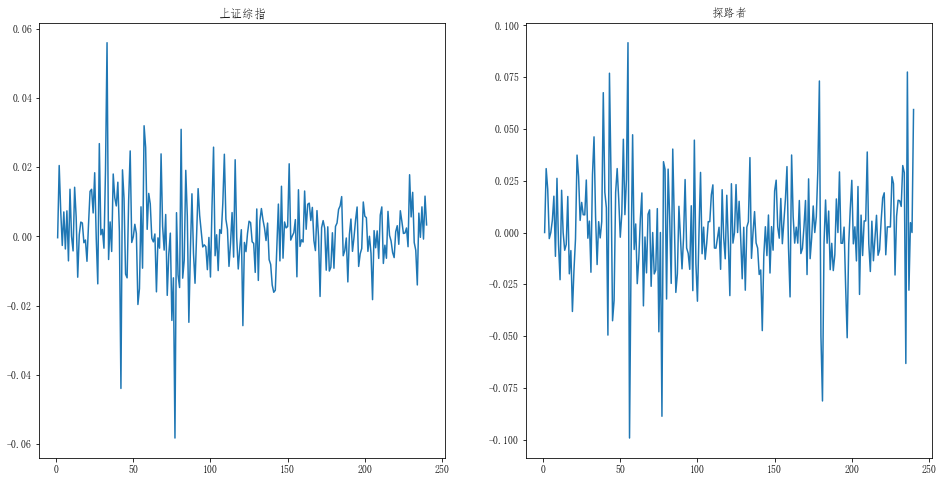

In [478]:
# 每日收益率可视化
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1,2,figsize = (16,8))
daily_return['上证综指'].plot(ax = ax[0])
daily_return['探路者'].plot(ax = ax[1])
ax[0].set_title('上证综指')
ax[1].set_title('探路者')
plt.show()

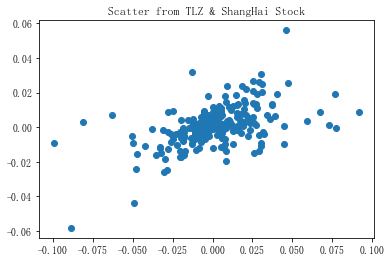

In [482]:
# 散点图
# fig, ax = plt.subplots(1,1,figsize = (16,8))
plt.scatter(daily_return['探路者'],daily_return['上证综指'])
plt.title('Scatter from TLZ & ShangHai Stock')
plt.show()

In [488]:
# 回归分析
import statsmodels.api as sm 
daily_return['intercept'] = 1
model = sm.OLS(daily_return['探路者'],daily_return['上证综指'],'intercept').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    探路者   R-squared (uncentered):                   0.268
Model:                            OLS   Adj. R-squared (uncentered):              0.265
Method:                 Least Squares   F-statistic:                              87.50
Date:                Mon, 31 Aug 2020   Prob (F-statistic):                    6.34e-18
Time:                        15:56:52   Log-Likelihood:                          583.18
No. Observations:                 240   AIC:                                     -1164.
Df Residuals:                     239   BIC:                                     -1161.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
上证综指           1.1196      0.120      9.354      0.000       0.884       1.355
==============================================================================
Omnibus:                       29.392   Durbin-Watson:                   2.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.389
Skew:                           0.188   Prob(JB):                     4.92e-34
Kurtosis:                       6.898   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""